Ex ante / ex post

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("../MT data/ex_ante_post.csv")
df1 = pd.read_csv("../MT data/detail_peripherally.csv")
year = pd.read_csv("../MT data/year.csv")
year_without_CCS = year.loc[~((year['CCS'] == 1) & (year['Biochar'] == 0) & (year['BECCS'] == 0) & (year['Blue Carbon'] == 0) 
                              & (year["Ocean alkalinity enhancement"] == 0) & (year['Forest Management'] == 0)
                              & (year['Soil Carbon Sequestration'] == 0)
                              & (year['Agroforestry'] == 0) & (year['Enhanced Weathering (land based)'] == 0)
                              & (year['Ocean fertilization & Artificial upwelling'] == 0)
                              & (year["DAC(CS)"] == 0) & (year['General Literature on CDR/NET'] == 0)
                              & (year["AR"] == 0)  & (year["restoration of landscapes/peats"] == 0)),:]

df = pd.merge(df, year_without_CCS[['id']], on='id', how='inner')
mask = df["Relevance"] == 1
df = df.loc[mask]
df = df.rename(columns={'AR': 'Afforestation', 'restoration of landscapes/peats': 'Peatland & Wetland Restoration', "Enhanced Weathering (land based)": "Enhanced Weathering", "DAC(CS)": "DACCS"})

df1 = pd.merge(df1, year_without_CCS[['id']], on='id', how='inner')
mask = df1["Relevance"] == 1
df1 = df1.loc[mask]
df1 = df1.rename(columns={'AR': 'Afforestation', 'restoration of landscapes/peats': 'Peatland and Wetland Restoration', "Enhanced Weathering (land based)": "Enhanced Weathering"})

df= pd.merge(df, df1[['id', 'In Depth']], on='id', how='left')

Share of papers ex ante/ex post of the years

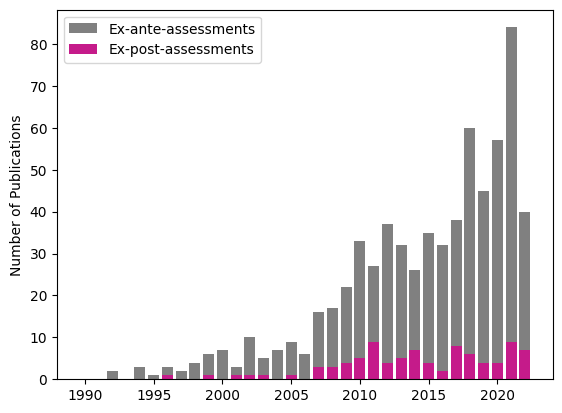

In [4]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[~df['year'].isna()]
year_range = pd.DataFrame({'year': range(1990, 2023)})
total_papers = df.groupby('year').size()
ex_post_counts = df[df["Ex post"] == 1].groupby("year").size()

total_papers = total_papers.reindex(year_range['year'], fill_value=0)
ex_post_counts = ex_post_counts.reindex(year_range['year'], fill_value=0)

#Create the bar plot
plt.bar(total_papers.index, total_papers.values - ex_post_counts.values, bottom=ex_post_counts.values, label='Ex-ante-assessments', color='grey')
plt.bar(ex_post_counts.index, ex_post_counts.values, label='Ex-post-assessments', color = '#c51b8a')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()


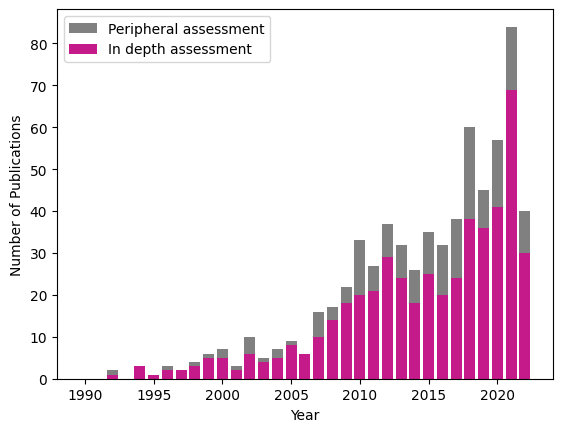

In [5]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[~df['year'].isna()]
year_range = pd.DataFrame({'year': range(1990, 2023)})
total_papers_depth = df.groupby('year').size()
in_depth_counts_depth = df[df["In Depth"] == 1].groupby("year").size()

total_papers_depth = total_papers_depth.reindex(year_range['year'], fill_value=0)
in_depth_counts_depth = in_depth_counts_depth.reindex(year_range['year'], fill_value=0)

#Create the bar plot
plt.bar(total_papers_depth.index, total_papers_depth.values - in_depth_counts_depth.values, bottom=in_depth_counts_depth.values, label='Peripheral assessment', color = 'grey')
plt.bar(in_depth_counts_depth.index, in_depth_counts_depth.values, label='In depth assessment', color = '#c51b8a')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()


Per technology

/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_10092/4245984900.py:32: RuntimeWarning: invalid value encountered in scalar divide
  percentage_share = percentage_share_count / col_count * 100


Text(0, 0.5, 'Percentage of Papers')

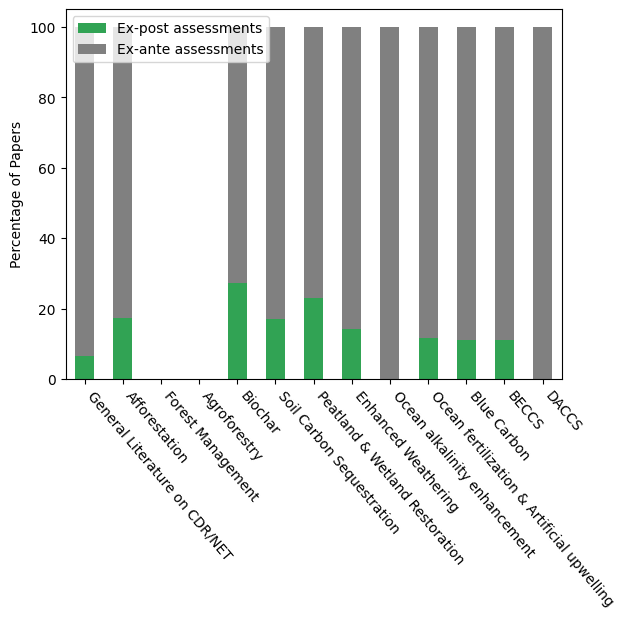

In [7]:
new_column_order = ["General Literature on CDR/NET", 
         "Afforestation", 
         "Forest Management",
         "Agroforestry",
         "Biochar",
         "Soil Carbon Sequestration",
         "Peatland & Wetland Restoration",
         "Enhanced Weathering",
         "Ocean alkalinity enhancement",
         "Ocean fertilization & Artificial upwelling",
         "Blue Carbon",
         "BECCS", "DACCS"]

#Create a new dataframe with the columns in the desired order
df_new = df[['Ex post'] + ['In Depth'] + new_column_order]


#Create an empty list to store the percentage shares and loop through all columns
percentage_shares = []
residuals = []

for column in new_column_order:
    col_count = df_new[column].sum()
    percentage_share_count = df_new[(df_new["Ex post"] == 1) & (df_new[column] == 1)].shape[0]
    percentage_share = percentage_share_count / col_count * 100
    percentage_shares.append(percentage_share)
    residuals.append(100 - percentage_share)

#Plot the data
data_ex = pd.DataFrame({'Ex-post assessments': percentage_shares, 'Ex-ante assessments': residuals})
colors = ['#31a354', 'grey']
data_ex.plot(kind='bar', stacked=True, color=colors)
plt.xticks(range(len(new_column_order)), new_column_order, rotation=310,  ha='left')
plt.ylabel('Percentage of Papers')


/var/folders/hx/r9c1jp511v15x5_0hmwf10p80000gn/T/ipykernel_10092/3552334806.py:30: RuntimeWarning: invalid value encountered in scalar divide
  percentage_share_depth = percentage_share_count_depth / col_count * 100


Text(0, 0.5, 'Percentage of Papers')

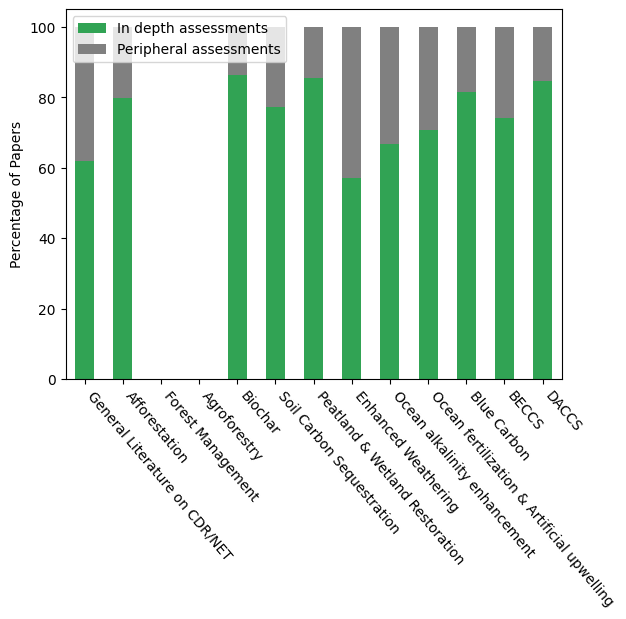

In [8]:
new_column_order = ["General Literature on CDR/NET", 
         "Afforestation", 
         "Forest Management",
         "Agroforestry",
         "Biochar",
         "Soil Carbon Sequestration",
         "Peatland & Wetland Restoration",
         "Enhanced Weathering",
         "Ocean alkalinity enhancement",
         "Ocean fertilization & Artificial upwelling",
         "Blue Carbon",
         "BECCS", "DACCS"]

percentage_shares_depth = []
residuals_depth = []

for column in new_column_order:
    col_count = df_new[column].sum()
    percentage_share_count_depth = df_new[(df_new["In Depth"] == 1) & (df_new[column] == 1)].shape[0]
    percentage_share_depth = percentage_share_count_depth / col_count * 100
    percentage_shares_depth.append(percentage_share_depth)
    residuals_depth.append(100 - percentage_share_depth)

data_depth = pd.DataFrame({'In depth assessments': percentage_shares_depth, 'Peripheral assessments': residuals_depth})
colors = ['#31a354', 'grey']
data_depth.plot(kind='bar', stacked=True, color=colors)
plt.xticks(range(len(new_column_order)), new_column_order, rotation=310,  ha='left')
plt.ylabel('Percentage of Papers')


Merge in one plot

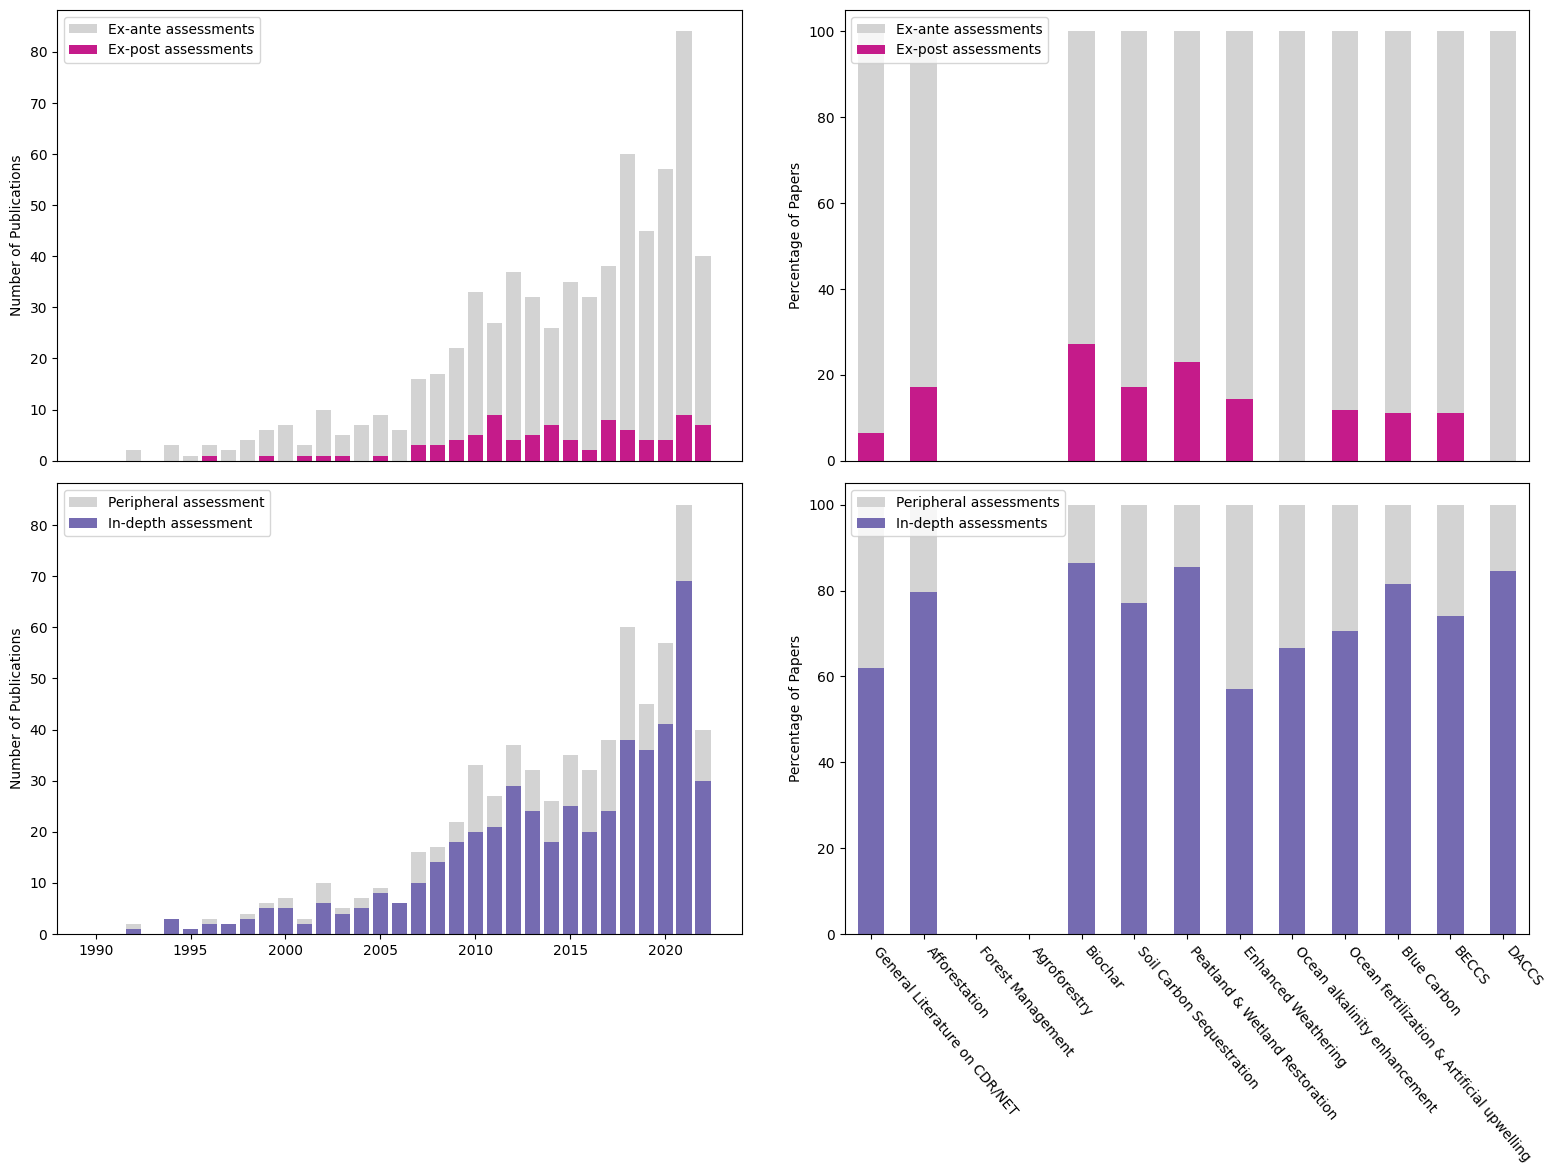

In [9]:
import matplotlib.cm as cm

#Create a faceted plot
fig, axs = plt.subplots(2, 2, figsize=(19,12))

#Plot the first subplot
axs[0, 0].bar(total_papers.index, total_papers.values - ex_post_counts.values, bottom=ex_post_counts.values, label='Ex-ante assessments', color='lightgrey')
axs[0, 0].bar(ex_post_counts.index, ex_post_counts.values, label='Ex-post assessments', color = '#c51b8a')
axs[0, 0].set_ylabel('Number of Publications')
axs[0, 0].legend()
axs[0, 0].set_xticks([])

#Plot the second subplot
axs[1, 0].bar(total_papers_depth.index, total_papers_depth.values - in_depth_counts_depth.values, bottom=in_depth_counts_depth.values, label='Peripheral assessment', color = 'lightgrey')
axs[1, 0].bar(in_depth_counts_depth.index, in_depth_counts_depth.values, label='In-depth assessment', color = '#756bb1')
axs[1, 0].set_ylabel('Number of Publications')
axs[1, 0].legend()

#Plot the third subplot
colors = ['#c51b8a', 'lightgrey']
data_ex = pd.DataFrame({'Ex-post assessments': percentage_shares, 'Ex-ante assessments': residuals})
data_ex.plot(kind='bar', stacked=True, color=colors, ax=axs[0, 1])
axs[0, 1].set_ylabel('Percentage of Papers')
axs[0, 1].set_xticks([])
handles, labels = axs[0, 1].get_legend_handles_labels()
axs[0, 1].legend(reversed(handles), reversed(labels))

#Plot the fourth subplot
colors = ['#756bb1', 'lightgrey']
data_depth = pd.DataFrame({'In-depth assessments': percentage_shares_depth, 'Peripheral assessments': residuals_depth})
data_depth.plot(kind='bar', stacked=True, color=colors, ax=axs[1, 1])
axs[1, 1].set_ylabel('Percentage of Papers')
axs[1, 1].set_xticks(range(len(new_column_order)))
axs[1, 1].set_xticklabels(new_column_order, rotation=310, ha='left')
handles, labels = axs[1, 1].get_legend_handles_labels()
axs[1, 1].legend(reversed(handles), reversed(labels))

fig.subplots_adjust(hspace = 0.05, wspace = 0.15)
fig.savefig('../MT data/Papers overview.png', dpi=300, bbox_inches='tight')
plt.show()
